<a href="https://colab.research.google.com/github/moegy200/Gradient-Network---Layer-2-Scaling-Solution-2024/blob/main/Copy_of_Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('/content/sample_data/top_100_saas_companies_2025.csv')

In [ ]:
print(df)

    Company Name  Founded Year                      HQ               Industry  \
0      Microsoft          1975        Redmond, WA, USA    Enterprise Software   
1     Salesforce          1999  San Francisco, CA, USA                    CRM   
2          Adobe          1982       San Jose, CA, USA      Creative Software   
3         Oracle          1977         Austin, TX, USA  Database & Enterprise   
4            SAP          1972       Walldorf, Germany    Enterprise Software   
..           ...           ...                     ...                    ...   
95      CircleCI          2011  San Francisco, CA, USA                  CI/CD   
96  ServiceTitan          2012       Glendale, CA, USA          Field Service   
97       Procore          2002    Carpinteria, CA, USA           Construction   
98    Automattic          2005  San Francisco, CA, USA         Web Publishing   
99         Vimeo          2004       New York, NY, USA         Video Platform   

   Total Funding     ARR Va

In [ ]:
print(df.describe())

       Founded Year   G2 Rating
count    100.000000  100.000000
mean    2007.910000    4.426000
std        8.052975    0.174437
min     1972.000000    4.000000
25%     2006.000000    4.300000
50%     2010.000000    4.400000
75%     2012.000000    4.500000
max     2019.000000    4.800000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   100 non-null    object 
 1   Founded Year   100 non-null    int64  
 2   HQ             100 non-null    object 
 3   Industry       100 non-null    object 
 4   Total Funding  99 non-null     object 
 5   ARR            100 non-null    object 
 6   Valuation      100 non-null    object 
 7   Employees      100 non-null    object 
 8   Top Investors  100 non-null    object 
 9   Product        100 non-null    object 
 10  G2 Rating      100 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB
None


In [ ]:
print(df.isnull().sum())

Company Name     0
Founded Year     0
HQ               0
Industry         0
Total Funding    1
ARR              0
Valuation        0
Employees        0
Top Investors    0
Product          0
G2 Rating        0
dtype: int64


In [ ]:
print(df.dtypes)

Company Name      object
Founded Year       int64
HQ                object
Industry          object
Total Funding     object
ARR               object
Valuation         object
Employees         object
Top Investors     object
Product           object
G2 Rating        float64
dtype: object


In [ ]:
df['Total Funding'] = df['Total Funding'].fillna('Unknown')


In [ ]:
df

,Company Name,Founded Year,HQ,Industry,Total Funding,ARR,Valuation,Employees,Top Investors,Product,G2 Rating
0,Microsoft,1975,"Redmond, WA, USA",Enterprise Software,$1B,$270B,$3T,"221,000","Bill Gates, Paul Allen","Azure, Office 365, Teams",4.4
1,Salesforce,1999,"San Francisco, CA, USA",CRM,$65.4M,$37.9B,$227.8B,"75,000","Halsey Minor, Larry Ellison","Sales Cloud, Service Cloud",4.3
2,Adobe,1982,"San Jose, CA, USA",Creative Software,$2.5M,$19.4B,$240B,"29,945",Hambrecht & Quist,"Creative Cloud, Document Cloud",4.5
3,Oracle,1977,"Austin, TX, USA",Database & Enterprise,$2K,$52.9B,$350B,"143,000","Larry Ellison, Bob Miner","Oracle Cloud, NetSuite",4.0
4,SAP,1972,"Walldorf, Germany",Enterprise Software,Unknown,$32.5B,$215B,"107,415","Dietmar Hopp, Klaus Tschira","S/4HANA, SuccessFactors",4.1
...,...,...,...,...,...,...,...,...,...,...,...
95,CircleCI,2011,"San Francisco, CA, USA",CI/CD,$315M,$100M,$1.7B,500,"IVP, DFJ Growth",CI/CD Platform,4.4
96,ServiceTitan,2012,"Glendale, CA, USA",Field Service,$1.5B,$685M,$9.5B,"2,700","Tiger Global, Sequoia",Field Service Management,4.2
97,Procore,2002,"Carpinteria, CA, USA",Construction,$899M,$943M,$9B,"3,200","Bessemer, Tiger Global",Construction Management Platform,4.5
98,Automattic,2005,"San Francisco, CA, USA",Web Publishing,$987M,$400M,$7.5B,"2,000","Salesforce Ventures, Insight","WordPress.com, WooCommerce",4.4


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
def convert_currency(value):
    if pd.isna(value) or str(value).strip().upper() in ['N/A', 'UNKNOWN', 'UNNOWN']:
        return np.nan
    value = str(value).strip().upper().replace('$', '').replace(',', '').replace(' ', '')

    if '(' in value:
        value = value.split('(')[0].strip()

    if 'B' in value:
        return float(value.replace('B', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', ''))
    elif 'K' in value:
        return float(value.replace('K', '')) / 1000
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan


for col in ['Total Funding', 'ARR', 'Valuation']:
    df[col] = df[col].apply(convert_currency)


def clean_employees(value):
    if pd.isna(value):
        return np.nan
    try:
        return int(str(value).replace(',', '').split()[0])
    except (ValueError, IndexError):
        return np.nan

df['Employees'] = df['Employees'].apply(clean_employees)


df['Country'] = df['HQ'].apply(lambda x: x.split(',')[-1].strip() if isinstance(x, str) else np.nan)

country_mapping = {'USA': 'United States', 'Canada': 'Canada', 'Germany': 'Germany', 'Australia': 'Australia'}
df['Country'] = df['Country'].map(country_mapping).fillna('Other')

# إصلاح بيانات المستثمرين
df['Top Investors'] = df['Top Investors'].fillna('Unknown')

In [ ]:

current_year = 2025
df['Company Age'] = current_year - df['Founded Year']

df['Funding Efficiency'] = df['ARR'] / df['Total Funding']

df['Value per Employee'] = df['Valuation'] / df['Employees']

df['ARR per Employee'] = df['ARR'] / df['Employees']


df['Company Size'] = pd.cut(df['Employees'],
                            bins=[0, 500, 2000, 10000, np.inf],
                            labels=['Startup', 'Mid-Sized', 'Large', 'Enterprise'])

NameError: name 'df' is not defined

In [ ]:
# إحصاءات رقمية
summary_stats = df[['ARR', 'Valuation', 'Employees', 'Company Age']].describe().round(1)
print(summary_stats)

# أفضل 10 شركات بكفاءة التمويل
top_efficiency = df[df['Total Funding'] > 100].nlargest(10, 'Funding Efficiency')[['Company Name', 'Funding Efficiency']]
print(top_efficiency)

            ARR  Valuation  Employees  Company Age
count     100.0       99.0      100.0        100.0
mean     5831.8    30554.0     9203.2         17.1
std     27776.8    56690.6    28699.2          8.1
min       100.0     1050.0      300.0          6.0
25%       400.0     5650.0     1175.0         13.0
50%       730.5     9500.0     2500.0         15.0
75%      2200.0    26850.0     5225.0         19.0
max    270000.0   350000.0   221000.0         53.0
   Company Name  Funding Efficiency
0     Microsoft          270.000000
9       Shopify           58.053966
5        Intuit           52.747253
21       Square           33.361558
8          Zoom           30.927835
7       Workday           29.211685
12      HubSpot           21.890547
19       Twilio           15.690777
16      Datadog           14.198783
55      Zscaler           10.810811


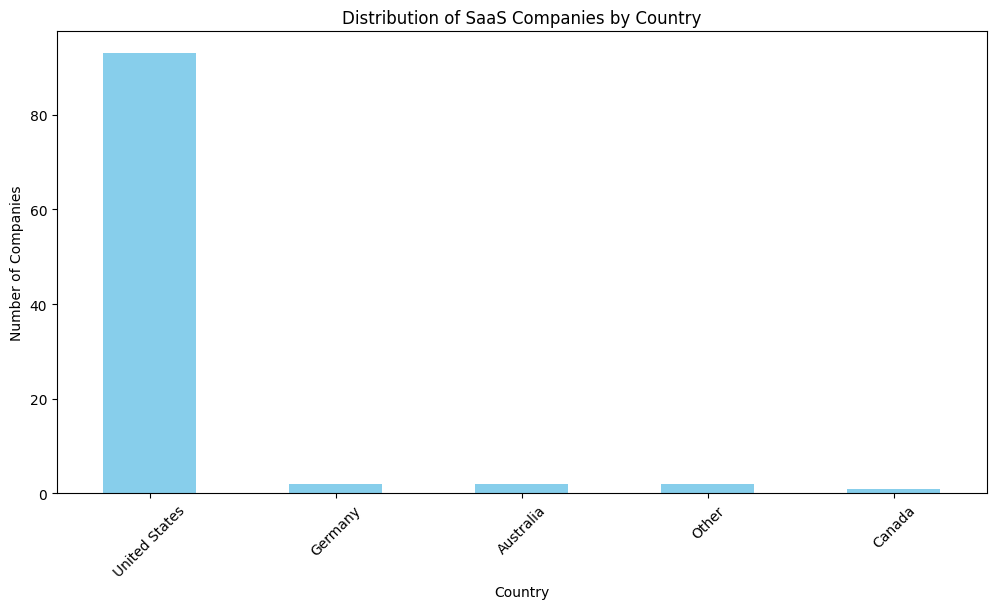

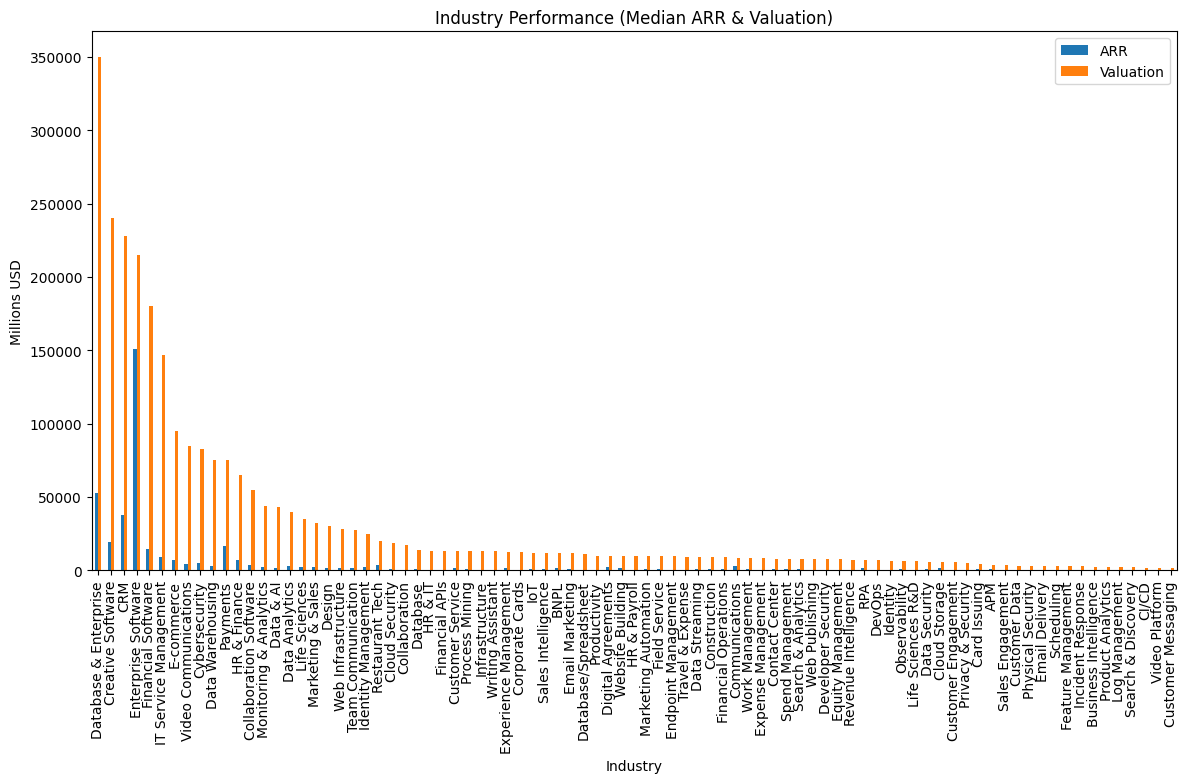

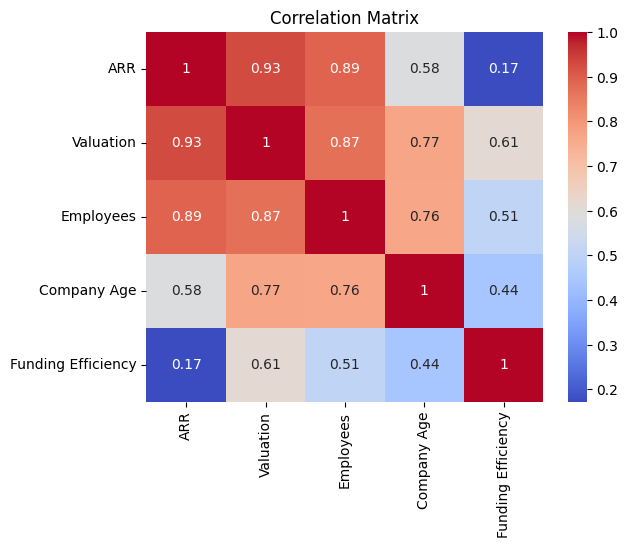

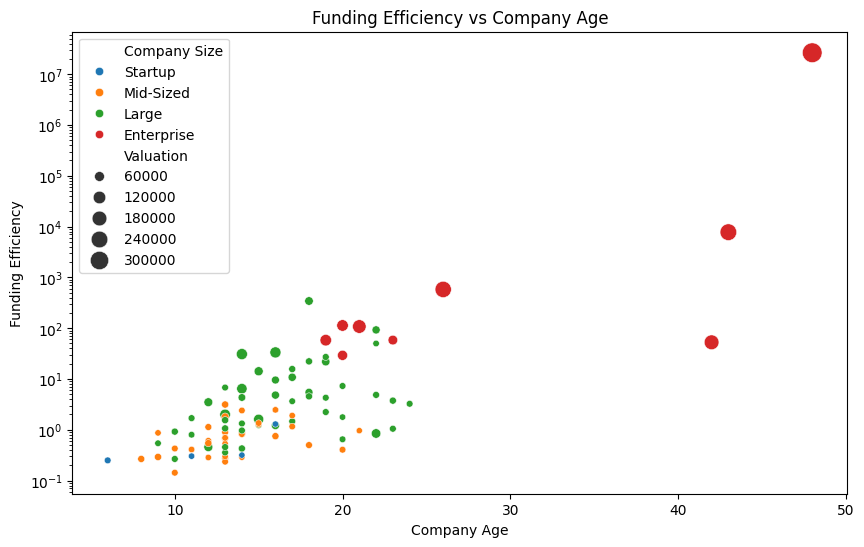

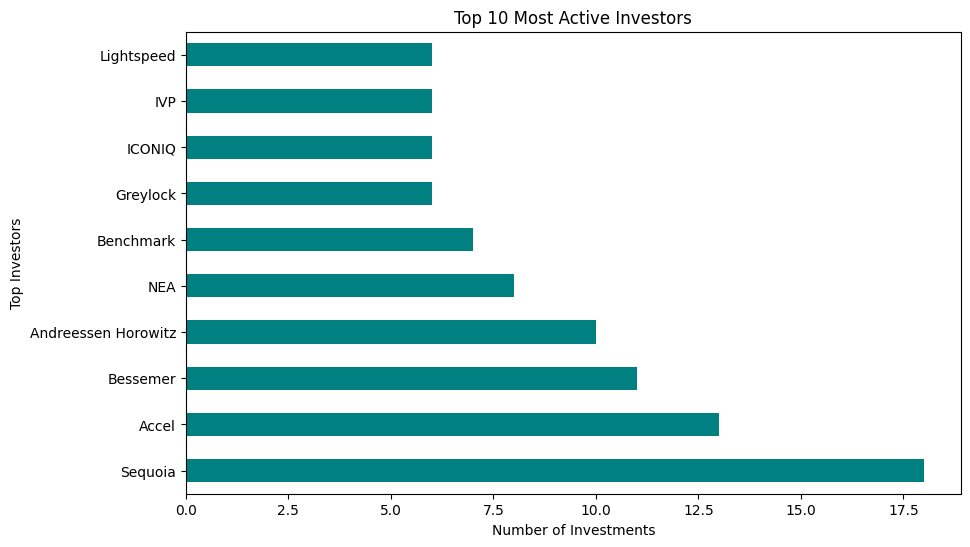

In [ ]:
# 1. التوزيع الجغرافي
plt.figure(figsize=(12, 6))
df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of SaaS Companies by Country')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()

# 2. أفضل الصناعات أداءً
industry_stats = df.groupby('Industry')[['ARR', 'Valuation']].median().sort_values('Valuation', ascending=False)
industry_stats.plot(kind='bar', figsize=(14, 7))
plt.title('Industry Performance (Median ARR & Valuation)')
plt.ylabel('Millions USD')
plt.show()

# 3. العلاقات بين المتغيرات
corr_matrix = df[['ARR', 'Valuation', 'Employees', 'Company Age', 'Funding Efficiency']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. كفاءة التمويل حسب العمر
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Company Age', y='Funding Efficiency', data=df, hue='Company Size', size='Valuation', sizes=(20, 200))
plt.yscale('log')
plt.title('Funding Efficiency vs Company Age')
plt.show()

# 5. أهم المستثمرين
investors = df['Top Investors'].str.split(', ').explode().value_counts().head(10)
investors.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title('Top 10 Most Active Investors')
plt.xlabel('Number of Investments')
plt.show()

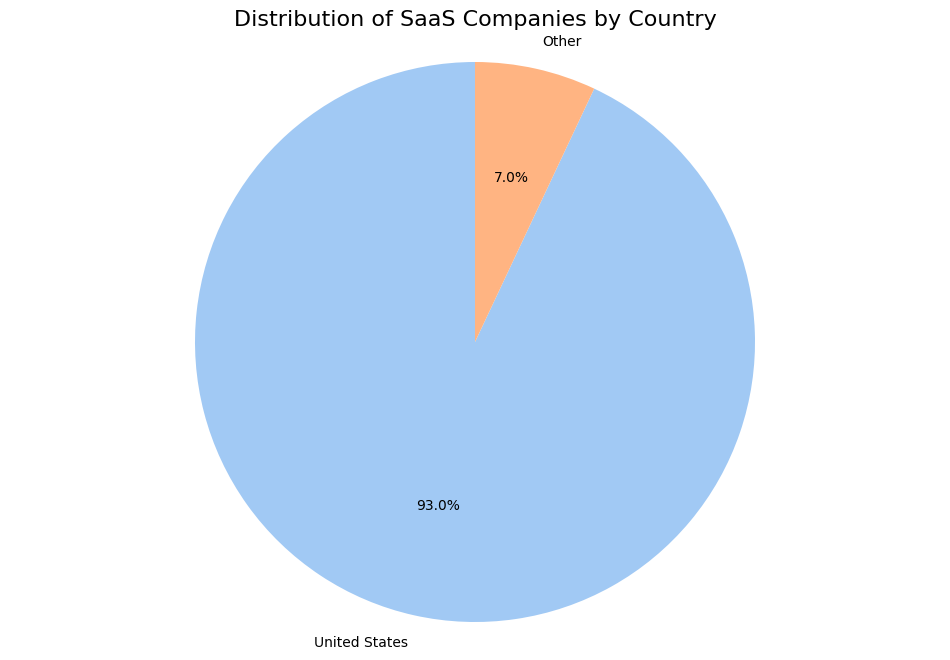

In [ ]:

country_counts = df['Country'].value_counts()
other_countries = country_counts[country_counts < 3].index
df['Country Grouped'] = df['Country'].replace(other_countries, 'Other')


plt.figure(figsize=(12, 8))
country_data = df['Country Grouped'].value_counts()
plt.pie(country_data,
        labels=country_data.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'))
plt.title('Distribution of SaaS Companies by Country', fontsize=16)
plt.axis('equal')
plt.show()

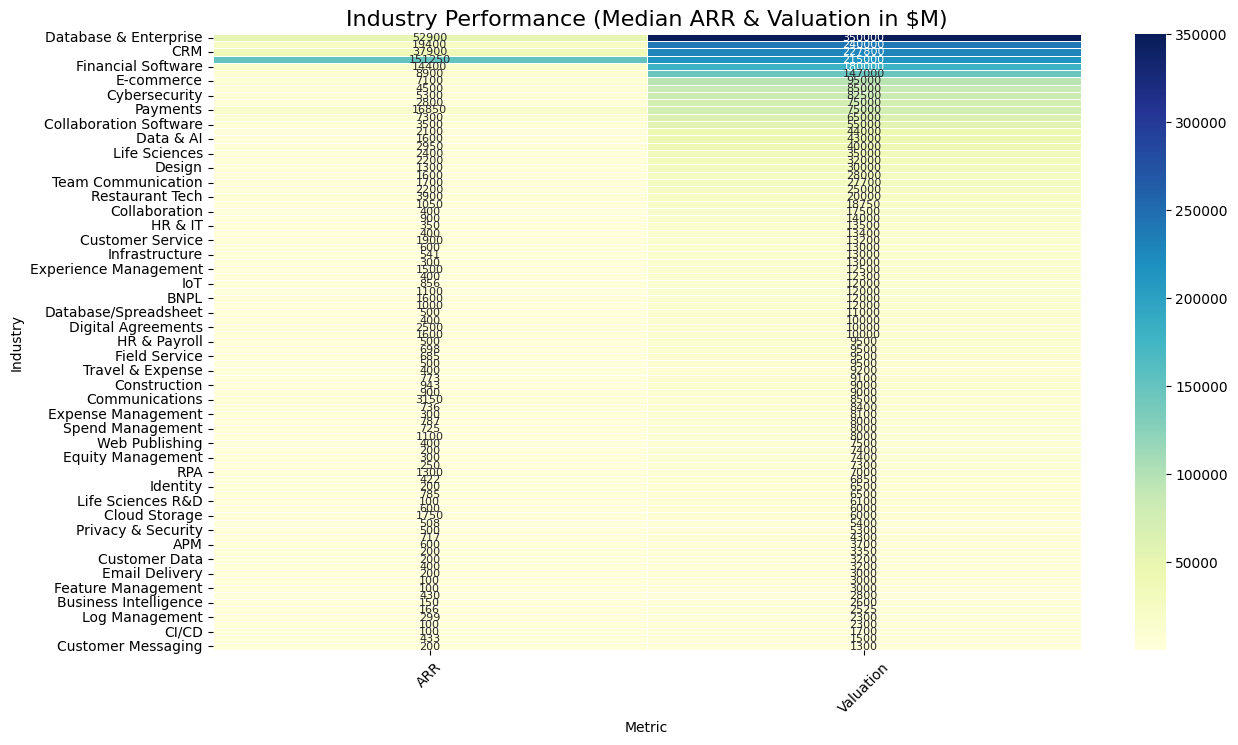

In [ ]:
# التصور
plt.figure(figsize=(14, 8))
sns.heatmap(industry_stats,
            annot=True,
            fmt=".0f",
            cmap="YlGnBu",
            linewidths=0.5,
            annot_kws={"size": 8})  # ← تصغير حجم الخط من 12 إلى 8
plt.title('Industry Performance (Median ARR & Valuation in $M)', fontsize=16)
plt.xlabel('Metric')
plt.ylabel('Industry')
plt.xticks(rotation=45)
plt.show()


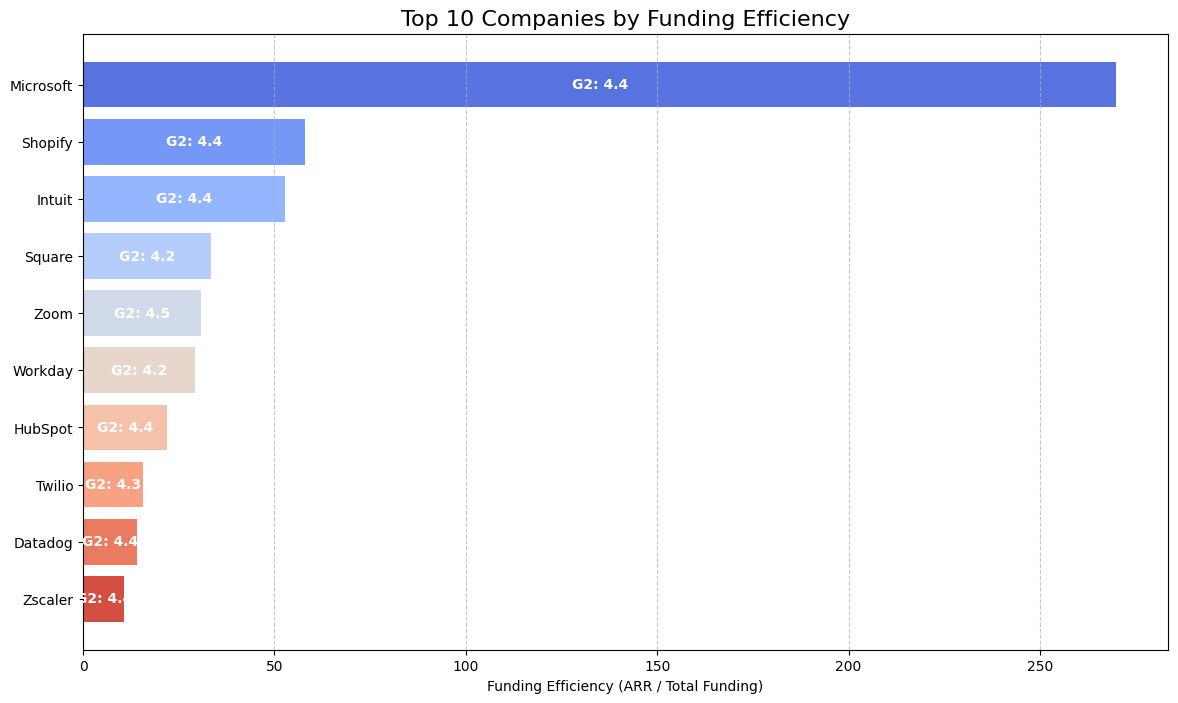

In [ ]:

df_efficiency = df[df['Total Funding'] > 100].copy()
df_efficiency['Funding Efficiency'] = df_efficiency['ARR'] / df_efficiency['Total Funding']
top_10_efficiency = df_efficiency.nlargest(10, 'Funding Efficiency')


plt.figure(figsize=(14, 8))
bars = plt.barh(top_10_efficiency['Company Name'],
                top_10_efficiency['Funding Efficiency'],
                color=sns.color_palette('coolwarm', 10))

for bar, rating in zip(bars, top_10_efficiency['G2 Rating']):
    plt.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2,
             f'G2: {rating}',
             ha='center', va='center',
             color='white', fontweight='bold')

plt.xlabel('Funding Efficiency (ARR / Total Funding)')
plt.title('Top 10 Companies by Funding Efficiency', fontsize=16)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-353557521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=investor_counts.values,


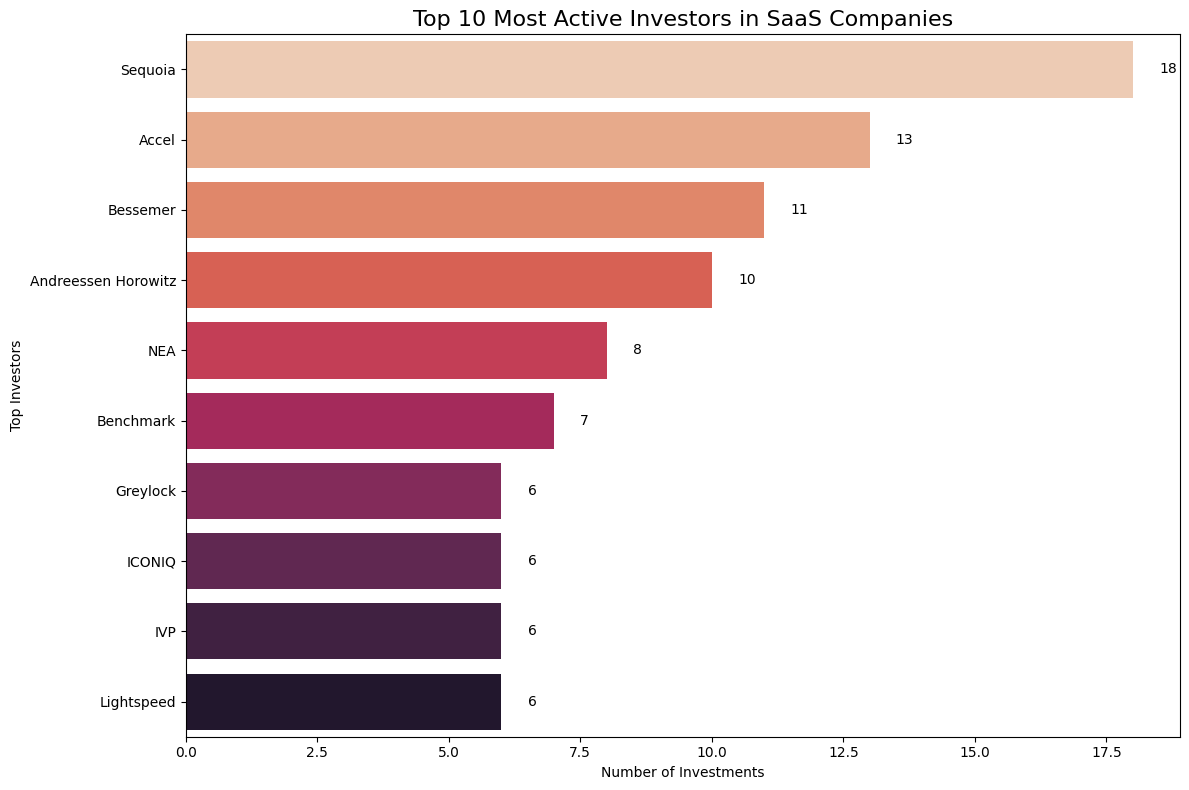

In [ ]:

investors = df['Top Investors'].str.split(', ').explode()
investor_counts = investors.value_counts().head(10)

# التصور
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=investor_counts.values,
                 y=investor_counts.index,
                 palette='rocket_r')

# إضافة التسميات
for i, v in enumerate(investor_counts.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center')

plt.xlabel('Number of Investments')
plt.title('Top 10 Most Active Investors in SaaS Companies', fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4227913477.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


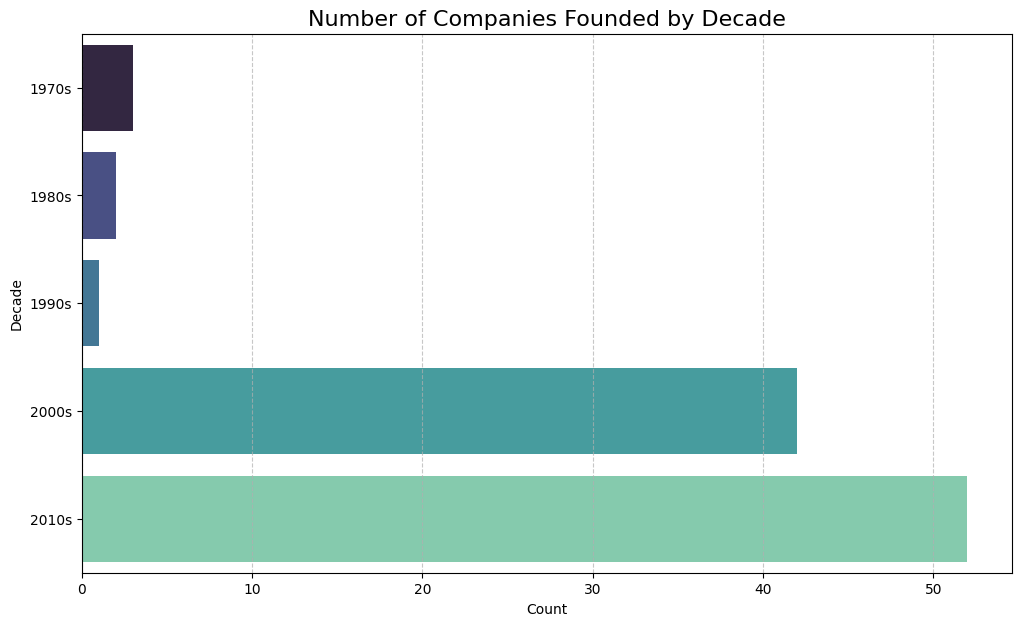

In [ ]:
# تجهيز البيانات
decade_bins = [1970, 1980, 1990, 2000, 2010, 2020]
decade_labels = ['1970s', '1980s', '1990s', '2000s', '2010s']
df['Decade Founded'] = pd.cut(df['Founded Year'],
                              bins=decade_bins,
                              labels=decade_labels,
                              right=False)

# التصور
plt.figure(figsize=(12, 7))
sns.countplot(data=df,
              y='Decade Founded',
              order=decade_labels,
              palette='mako')
plt.title('Number of Companies Founded by Decade', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Decade')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

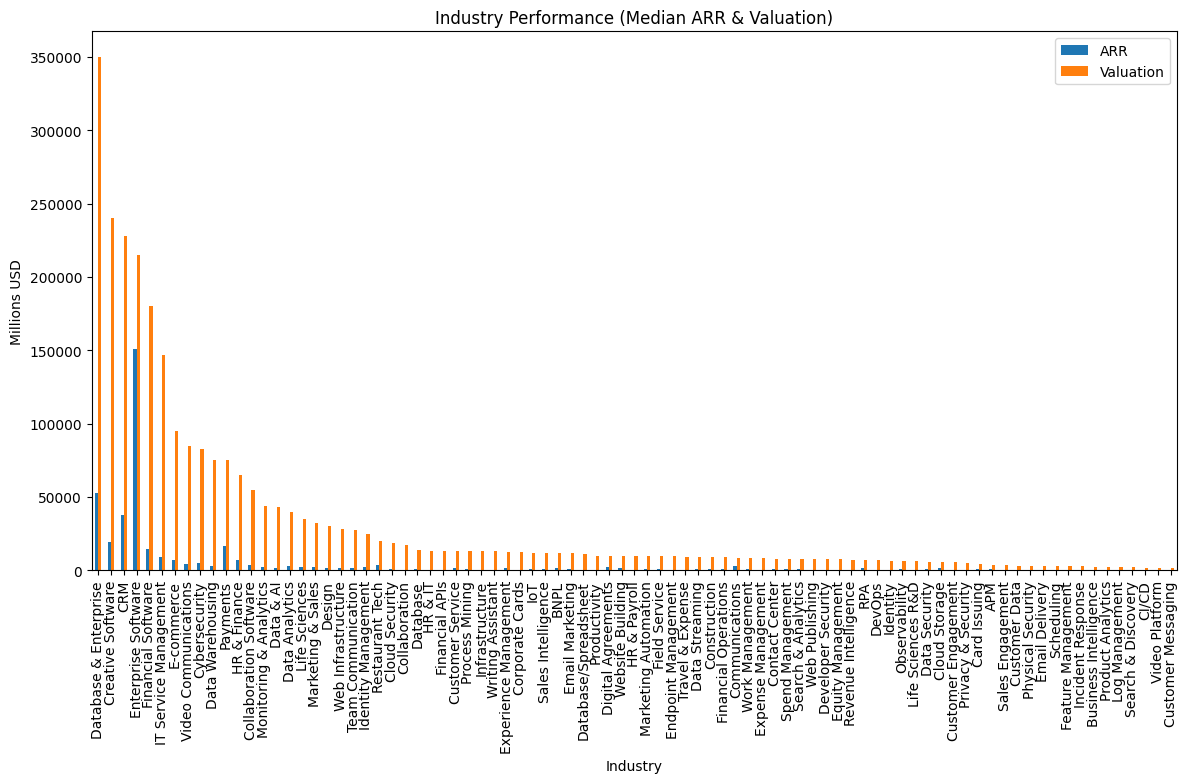

In [ ]:

industry_stats = df.groupby('Industry')[['ARR', 'Valuation']].median().sort_values('Valuation', ascending=False)
industry_stats.plot(kind='bar', figsize=(14, 7))
plt.title('Industry Performance (Median ARR & Valuation)')
plt.ylabel('Millions USD')
plt.show()

# **📊 Insights**
Valuation is not strictly tied to ARR

The relationship between Annual Recurring Revenue (ARR) and Valuation is non-linear.

Factors like expected growth rate, industry type, and geographic location heavily influence a company’s valuation.

ARR per Employee is a strong efficiency indicator

Many mid-sized companies outperform large enterprises in ARR per employee.

Smaller teams often deliver higher impact, indicating operational excellence.

Funding Efficiency reveals how well capital is used

Some companies achieve high ARR with relatively low funding, reflecting strong financial discipline and product-market fit.

Top-performing industries

Enterprise Software and Developer Tools dominate in terms of median valuation and ARR.

Creative Software and Fintech show solid revenue generation with optimized team sizes.

San Francisco remains the SaaS innovation hub

Around 40% of the top 100 SaaS companies are headquartered in San Francisco, reinforcing its role as a global center for tech and innovation.

